<a href="https://colab.research.google.com/github/tdbartolo/tdbartolo-rep/blob/main/MVP_billionaries_statistics_tamara_Revisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP de Análise de Dados e Boas Práticas

### Aluna: Tamara Di Bartolo


## 1. Definição do Problema

###**1.1.Qual é a descrição do problema?**

O problema consiste em classificar bilionários com base em uma variável chamada "selfMade", que indica se alcançaram sua fortuna por mérito próprio (TRUE) ou herdaram a riqueza (FALSE). O objetivo é criar um modelo de classificação que possa prever se um bilionário é "selfMade" com base em outras características disponíveis no conjunto de dados.

###**1.2.Este é um problema de aprendizado supervisionado ou não supervisionado?**

Este é um problema de aprendizado supervisionado, pois temos uma variável de saída ("selfMade") que é usada para treinar e avaliar o modelo. A tarefa consiste em classificar os bilionários em duas categorias: "selfMade" e "não selfMade".

###**1.3.Que premissas ou hipóteses você tem sobre o problema?**
**Premissa**: A variável "selfMade" é uma medida precisa da origem da riqueza dos bilionários. Acredita-se que essa variável fornece uma representação fiel de como os bilionários alcançaram sua fortuna. A confiabilidade dessa medida é essencial para o sucesso do modelo de classificação.

**Hipóteses:**

**i. Proporção de Origens de Riqueza:**

Hipótese: A proporção de bilionários que herdaram sua riqueza é maior do que a proporção de bilionários "selfmade".
Justificativa: Parte-se da premissa de que, globalmente, há uma tendência maior de herança de riqueza do que de conquista individual.

**ii. Disparidade de Gênero na Origem da Riqueza:**

Hipótese: A origem da riqueza varia entre os gêneros, com uma proporção maior de bilionários homens tendo alcançado seu status por méritos próprios em comparação com as bilionárias mulheres. Justificativa: Considerando contextos históricos e sociais, a hipótese explora se os homens bilionários são mais propensos a terem construído suas fortunas através de conquistas pessoais.

**iii. Influência da Idade na Origem da Riqueza:**

Hipótese: Bilionários mais velhos têm uma probabilidade maior de terem construído suas fortunas por mérito próprio em comparação com bilionários mais jovens. Justificativa: A suposição é que a experiência e o conhecimento acumulado ao longo dos anos podem contribuir para uma maior incidência de conquista individual entre os bilionários mais velhos.

**iv. Indústria de Tecnologia:**

Hipótese: A indústria de Tecnologia é a mais comum entre os bilionários "selfMade".
Justificativa: A rápida ascensão de bilionários na indústria de Tecnologia sugere que essa área pode ser uma fonte proeminente de fortunas construídas por mérito próprio.</br>


**v. Relação entre Produto Interno Bruto (PIB) e Herança de Riqueza:**

Hipótese: Em países com maior Produto Interno Bruto, a proporção de bilionários que herdou a riqueza é maior. Justificativa: A ideia subjacente é que em economias mais robustas, as oportunidades de herança de riqueza podem ser mais amplas.</b>


Essas hipóteses e premissas são fundamentais para a abordagem da análise exploratória dos dados e a seleção de variáveis relevantes para o modelo de classificação. Elas são guias importantes para entender as dinâmicas por trás da variável "selfMade" e para interpretar os resultados do modelo.



###**1.4.Que restrições ou condições foram impostas para selecionar os dados?**
 Os dados parecem ser centrados em bilionários do ranking mais alto, mas não é especificado qual é o critério para a inclusão ou exclusão de bilionários no conjunto de dados.
Não são fornecidas informações sobre a fonte dos dados, o que pode impactar a confiabilidade das informações.


###**1.5.Definição de atributos do conjunto de dados:**

Dataset disponível em https://www.kaggle.com/datasets/nelgiriyewithana/billionaires-statistics-dataset/data.
 Contém informações detalhadas sobre bilionários, incluindo características como fortuna, idade, país de origem, fonte de riqueza e a variável de saída "selfMade".

<u>**rank:** </u>Classificação do bilionário.

<u>**finalWorth:**</u> Fortuna final do bilionário em dólares.

**category:** Categoria à qual o bilionário pertence.

**personName:** Nome do bilionário.

<u>**age:**</u> Idade do bilionário.

**country:** País de origem do bilionário.

**city:** Cidade de origem do bilionário.

**source:** Fonte da riqueza do bilionário.

<u>**industries:**</u> Indústrias associadas ao bilionário.

**ctzship:** País de cidadania do bilionário.

**organization:** Organização associada ao bilionário.

**status:** Status do bilionário.

<u>**gender:**</u> Gênero do bilionário.

**birthDate:** Data de nascimento do bilionário.

**lastName:** Sobrenome do bilionário.

**firstName:** Nome do bilionário.

**title:** Título ou posição do bilionário.

**date:** Data da informação.

**state:** Estado de origem do bilionário.

**resStateRgn:** Região do estado de residência do bilionário.

**birthYear:** Ano de nascimento do bilionário.

**birthMonth:** Mês de nascimento do bilionário.

**birthDay:** Dia de nascimento do bilionário.


<u>**cpiCtry:**</u> Índice de Preços ao Consumidor do país.

**cpiChgCtry:** Mudança no Índice de Preços ao Consumidor do país.

<u>**gdpCtry:**</u> Produto Interno Bruto do país.

<u>**tertiaryEnroll:**</u> Inscrição bruta no ensino superior no país.

<u>**primaryEnrollCtry:**</u> Inscrição bruta no ensino primário no país.

<u>**lifeExpectCtry:**</u> Expectativa de vida no país.

<u>**taxRevCtry:**</u> Receita fiscal do país.

<u>**totalTaxRate:**</u> Taxa de imposto total no país.

<u>**populationCtry:**</u> População do país.

**latitudeCtry:** Latitude do país.

**longitudeCtry:** Longitude do país.

<u>**selfMade:**</u> Variável de saída indicando se o bilionário é "selfMade" (TRUE) ou não (FALSE).

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
!pip install missingno
import missingno as ms # para tratamento de missings
from matplotlib import cm
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

## 2. Carga de dados e seleção preliminar dos atributos

Nesta seção, realiza-se a carga de um conjunto de dados sobre bilionários a partir de uma URL específica usando a biblioteca Pandas. O conjunto de dados é inicialmente definido com colunas específicas. Após a leitura do arquivo CSV, as colunas são renomeadas para terem no máximo 10 caracteres. Além disso, a coluna 'selfMade' é movida para o final do conjunto de dados, organizando-o de acordo com os requisitos específicos. A função dataset.head() é usada para exibir as primeiras linhas do DataFrame permitindo uma visão rápida dos dados. O resultado é um DataFrame pronto para análises subsequentes, adaptado conforme as necessidades do projeto.

In [3]:
# Carrega arquivo csv usando Pandas usando uma URL

# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/tdbartolo/tdbartolo-rep/main/mvp-analise-de-dados-e-boas-praticas/Billionaires%20Statistics%20Dataset.csv"

# Informa o cabeçalho das colunas
colunas = ['rank', 'finalWorth',	'category', 'personName',	'age',	'country',	'city',	'source',	'industries',	'countryOfCitizenship',	'organization',	'selfMade',	'status', 'gender',	'birthDate',	'lastName',	'firstName',	'title',	'date',	'state',	'residenceStateRegion',	'birthYear',	'birthMonth',	'birthDay',	'cpi_country',	'cpi_change_country',	'gdp_country',	'gross_tertiary_education_enrollment',	'gross_primary_education_enrollment_country',	'life_expectancy_country',	'tax_revenue_country_country',	'total_tax_rate_country',	'population_country',	'latitude_country',	'longitude_country']

# Lê o arquivo utilizando as colunas informadas
dataset = pd.read_csv(url, names=colunas, skiprows=1, delimiter=',')

# Renomeia as colunas para até 10 caracteres
dataset.columns = ['rank', 'finalWorth', 'category', 'personName', 'age', 'country', 'city', 'source', 'industries',
                   'ctzship', 'organization', 'selfMade', 'status', 'gender', 'birthDate', 'lastName', 'firstName',
                   'title', 'date', 'state', 'resStateRgn', 'birthYear', 'birthMonth', 'birthDay', 'cpiCtry',
                   'cpiChgCtry', 'gdpCtry', 'tertiaryEnroll', 'primaryEnrollCtry', 'lifeExpectCtry', 'taxRevCtry',
                   'totalTaxRate', 'populationCtry', 'latitudeCtry', 'longitudeCtry']

# Mover a coluna 'selfMade' para o final
dataset = dataset[[col for col in dataset.columns if col != 'selfMade'] + ['selfMade']]


In [4]:
pd.set_option('display.max_columns', None)
dataset.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,ctzship,organization,status,gender,birthDate,lastName,firstName,title,date,state,resStateRgn,birthYear,birthMonth,birthDay,cpiCtry,cpiChgCtry,gdpCtry,tertiaryEnroll,primaryEnrollCtry,lifeExpectCtry,taxRevCtry,totalTaxRate,populationCtry,latitudeCtry,longitudeCtry,selfMade
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,LVMH Moët Hennessy Louis Vuitton,U,M,3/5/1949 0:00,Arnault,Bernard,Chairman and CEO,4/4/2023 5:01,NaN,NaN,1949.0,3.0,5.0,110.05,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749,False
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,Tesla,D,M,6/28/1971 0:00,Musk,Elon,CEO,4/4/2023 5:01,Texas,South,1971.0,6.0,28.0,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891,True
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,Amazon,D,M,1/12/1964 0:00,Bezos,Jeff,Chairman and Founder,4/4/2023 5:01,Washington,West,1964.0,1.0,12.0,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891,True
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,Oracle,U,M,8/17/1944 0:00,Ellison,Larry,CTO and Founder,4/4/2023 5:01,Hawaii,West,1944.0,8.0,17.0,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891,True
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,Berkshire Hathaway Inc. (Cl A),D,M,8/30/1930 0:00,Buffett,Warren,CEO,4/4/2023 5:01,Nebraska,Midwest,1930.0,8.0,30.0,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891,True


In [5]:
#Apresenta uma visão com a quantidade de valores distintos para cada atributo. Permite avaliar atributos com valores únicos que poderão ser desconsiderados na redução de dimensionalidade.
dataset.nunique()

rank                  219
finalWorth            219
category               18
personName           2638
age                    79
country                78
city                  741
source                906
industries             18
ctzship                77
organization          294
status                  6
gender                  2
birthDate            2060
lastName             1736
firstName            1770
title                  97
date                    2
state                  45
resStateRgn             5
birthYear              77
birthMonth             12
birthDay               31
cpiCtry                63
cpiChgCtry             44
gdpCtry                68
tertiaryEnroll         63
primaryEnrollCtry      60
lifeExpectCtry         54
taxRevCtry             57
totalTaxRate           63
populationCtry         68
latitudeCtry           68
longitudeCtry          68
selfMade                2
dtype: int64


Abaixo vamos realizar a redução de dimensionalidade com o intuito de otimizar a eficiência computacional e reduzir a complexidade do conjunto de dados. Os atributos 'category', 'personName', 'country', 'city', 'source', 'ctzship', 'organization', 'status', 'birthDate', 'lastName', 'firstName', 'title', 'date', 'state', 'resStateRgn', 'birthYear', 'birthMonth', 'birthDay', 'cpiChgCtry', 'taxRevCtry', 'latitudeCtry', 'longitudeCtry' foram removidos imediatamente após o carregamento, visando eliminar características irrelevantes, reduzir ruídos e remover dependências lineares entre os atributos, como variáveis correlacionadas.

A exclusão desses atributos é justificada pela presença de **informações redundantes ou únicas** para cada bilionário, como os nomes ('personName', 'lastName', 'firstName') e cidades de origem. Esses atributos não contribuem significativamente para o modelo de aprendizado de máquina e podem até mesmo prejudicar o desempenho, induzindo ao overfitting.

Além disso, a exclusão de variáveis únicas (observado no código acima) evita um aumento desnecessário na dimensionalidade dos dados. Foi observado que manter certas variáveis únicas não agrega valor ao modelo e pode complicar a análise.

A escolha de manter o atributo 'age' e excluir os atributos 'birthDate', 'birthYear', 'birthMonth' e 'birthDay' foi motivada pela redundância de informações contidas nesses últimos em relação à idade. Da mesma forma, 'totalTaxRate' já fornece uma medida abrangente da carga tributária, incluindo todas as formas de impostos em relação à atividade econômica e a inclusão de taxRevCtry poderia ser redundante. O mesmo pode ser verificado em relação ao atributo cpiCtry que já fornece informações suficientes sobre o Índice de Preços ao Consumidor do país e a inclusão de cpiChgCtry poderia ser redundante.

A decisão de manter 'gdpcountry' e excluir 'country', 'city', 'latitudeCtry' e 'longitudeCtry' foi tomada com base na relevância do Produto Interno Bruto (GDP) do país em comparação com as informações específicas de localização e país.  

Além disso, a exclusão dos atributos 'category' foi realizada visando eliminar informações redundantes e simplificar a representação do conjunto de dados. A categoria à qual o bilionário pertence ('category') foi removida em favor da manutenção do atributo 'industries', que oferece informações mais específicas e relevantes sobre as áreas de atuação dos bilionários. Essa abordagem visa preservar informações essenciais enquanto simplifica o conjunto de dados.

In [6]:
# Exclui as variáveis 'lastName', 'firstName', 'personName', 'city'
dataset = dataset.drop(['category', 'personName', 'country', 'city', 'source', 'ctzship', 'organization', 'status', 'birthDate', 'lastName', 'firstName', 'title', 'date', 'state', 'resStateRgn', 'birthYear', 'birthMonth', 'birthDay', 'cpiChgCtry', 'taxRevCtry', 'latitudeCtry', 'longitudeCtry'], axis=1)

dataset.head()

,rank,finalWorth,age,industries,gender,cpiCtry,gdpCtry,tertiaryEnroll,primaryEnrollCtry,lifeExpectCtry,totalTaxRate,populationCtry,selfMade
0,1,211000,74.0,Fashion & Retail,M,110.05,"$2,715,518,274,227",65.6,102.5,82.5,60.7,67059887.0,False
1,2,180000,51.0,Automotive,M,117.24,"$21,427,700,000,000",88.2,101.8,78.5,36.6,328239523.0,True
2,3,114000,59.0,Technology,M,117.24,"$21,427,700,000,000",88.2,101.8,78.5,36.6,328239523.0,True
3,4,107000,78.0,Technology,M,117.24,"$21,427,700,000,000",88.2,101.8,78.5,36.6,328239523.0,True
4,5,106000,92.0,Finance & Investments,M,117.24,"$21,427,700,000,000",88.2,101.8,78.5,36.6,328239523.0,True


O trecho a seguir realiza a codificação de duas variáveis categóricas ('gender' e 'selfMade') em valores numéricos binários em um DataFrame chamado dataset. Para 'gender', valores 'F' são codificados como 0 e 'M' como 1. Para 'selfMade', valores False são codificados como 0 e True como 1. Essa transformação é útil para permitir o processamento de informações categóricas por algoritmos de aprendizado de máquina que esperam entradas numéricas.

In [7]:
# Transforma a variável 'gender' em 0 e 1
gender_mapping = {'F': 0, 'M': 1}
dataset['gender'] = dataset['gender'].map(gender_mapping)

# Transforma a variável 'selfMade' em 0 e 1
selfmade_mapping = {False: 0, True: 1}
dataset['selfMade'] = dataset['selfMade'].map(selfmade_mapping)

## 3. Análise de Dados

### 3.1. Estatísticas Descritivas

Nesta etapa daremos início à exploração detalhada do dataset, buscando compreender suas principais características e propriedades. Inicialmente, examinaremos as dimensões do conjunto de dados para ter uma visão geral de sua extensão. Em seguida, nos aprofundaremos nas informações gerais fornecidas pelo dataset, abordando aspectos cruciais, como a presença de valores ausentes, a distribuição de variáveis-chave e a natureza das características incluídas. Para ilustrar a diversidade do conjunto de dados, apresentaremos alguns exemplos representativos de suas linhas. Essa análise preliminar proporcionará um contexto valioso para as análises subsequentes, estabelecendo as bases para uma compreensão mais aprofundada e verificação das hipóteses propostas nesse trabalho.

In [8]:
# Mostra as dimensões do dataset
print(dataset.shape)

(2640, 13)


In [9]:
# Mostra as informações do dataset
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rank               2640 non-null   int64  
 1   finalWorth         2640 non-null   int64  
 2   age                2575 non-null   float64
 3   industries         2640 non-null   object 
 4   gender             2640 non-null   int64  
 5   cpiCtry            2456 non-null   float64
 6   gdpCtry            2476 non-null   object 
 7   tertiaryEnroll     2458 non-null   float64
 8   primaryEnrollCtry  2459 non-null   float64
 9   lifeExpectCtry     2458 non-null   float64
 10  totalTaxRate       2458 non-null   float64
 11  populationCtry     2476 non-null   float64
 12  selfMade           2640 non-null   int64  
dtypes: float64(7), int64(4), object(2)
memory usage: 268.2+ KB
None


In [10]:
# Mostra as 10 primeiras linhas do dataset
dataset.head(10)

,rank,finalWorth,age,industries,gender,cpiCtry,gdpCtry,tertiaryEnroll,primaryEnrollCtry,lifeExpectCtry,totalTaxRate,populationCtry,selfMade
0,1,211000,74.0,Fashion & Retail,1,110.05,"$2,715,518,274,227",65.6,102.5,82.5,60.7,6.705989e+07,0
1,2,180000,51.0,Automotive,1,117.24,"$21,427,700,000,000",88.2,101.8,78.5,36.6,3.282395e+08,1
2,3,114000,59.0,Technology,1,117.24,"$21,427,700,000,000",88.2,101.8,78.5,36.6,3.282395e+08,1
3,4,107000,78.0,Technology,1,117.24,"$21,427,700,000,000",88.2,101.8,78.5,36.6,3.282395e+08,1
4,5,106000,92.0,Finance & Investments,1,117.24,"$21,427,700,000,000",88.2,101.8,78.5,36.6,3.282395e+08,1
5,6,104000,67.0,Technology,1,117.24,"$21,427,700,000,000",88.2,101.8,78.5,36.6,3.282395e+08,1
6,7,94500,81.0,Media & Entertainment,1,117.24,"$21,427,700,000,000",88.2,101.8,78.5,36.6,3.282395e+08,1
7,8,93000,83.0,Telecom,1,141.54,"$1,258,286,717,125",40.2,105.8,75.0,55.1,1.260140e+08,1
8,9,83400,65.0,Diversified,1,180.44,"$2,611,000,000,000",28.1,113.0,69.4,49.7,1.366418e+09,0
9,10,80700,67.0,Technology,1,117.24,"$21,427,700,000,000",88.2,101.8,78.5,36.6,3.282395e+08,1


In [11]:
# Mostra as 10 últimas linhas do dataset
dataset.tail(10)

,rank,finalWorth,age,industries,gender,cpiCtry,gdpCtry,tertiaryEnroll,primaryEnrollCtry,lifeExpectCtry,totalTaxRate,populationCtry,selfMade
2630,2540,1000,35.0,Manufacturing,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2631,2540,1000,54.0,Fashion & Retail,1,125.08,"$19,910,000,000,000",50.6,100.2,77.0,59.2,1.397715e+09,1
2632,2540,1000,59.0,Manufacturing,1,125.08,"$19,910,000,000,000",50.6,100.2,77.0,59.2,1.397715e+09,1
2633,2540,1000,53.0,Manufacturing,1,125.08,"$19,910,000,000,000",50.6,100.2,77.0,59.2,1.397715e+09,1
2634,2540,1000,63.0,Healthcare,1,125.08,"$19,910,000,000,000",50.6,100.2,77.0,59.2,1.397715e+09,1
2635,2540,1000,51.0,Healthcare,1,125.08,"$19,910,000,000,000",50.6,100.2,77.0,59.2,1.397715e+09,1
2636,2540,1000,80.0,Food & Beverage,1,117.24,"$21,427,700,000,000",88.2,101.8,78.5,36.6,3.282395e+08,0
2637,2540,1000,60.0,Manufacturing,1,125.08,"$19,910,000,000,000",50.6,100.2,77.0,59.2,1.397715e+09,1
2638,2540,1000,71.0,Real Estate,1,125.08,"$19,910,000,000,000",50.6,100.2,77.0,59.2,1.397715e+09,1
2639,2540,1000,66.0,Diversified,1,129.61,"$376,795,508,680",35.5,107.5,71.1,43.1,1.081166e+08,0


Observando as primeiras e últimas linhas do dataset verificamos a predominância de campos numéricos, e somente um campo categórico "industries". Podemos destacar alguns pontos que devem ser tratados:

1. Valor faltante (NaN)
2. Uso do símbolo de moeda do campo gdpCtry
3. Campo categórico "Industries"

No código abaixo eliminamos o símbolo "$" do atributo **gdpCtry** e convertemos em campo numérico.

In [12]:
# Remove o símbolo '$' e converte para tipo numérico
dataset['gdpCtry'] = pd.to_numeric(dataset['gdpCtry'].replace('[\$,]', '', regex=True), errors='coerce')

O resumo estatístico abaixo engloba informações de 2640 bilionários, destacando-se por uma ampla variedade de características. Abaixo alguns insights para melhorar o entendimento inicial dos dados:  
1. Fortuna final média de aproximadamente $4.6 bilhões.
2. A idade média é de cerca de 65 anos.
3. Predominância masculina, com uma média de 0.87 no indicador de gênero.
4. As variáveis relacionadas aos países dos bilionários, como o Índice de Preços ao Consumidor (cpiCtry) e o Produto Interno Bruto (gdpCtry), oferecem insights sobre o ambiente econômico.
5. <font color="red">A média de inscrição bruta no ensino superior (67.23%) e no ensino primário (102.86%) destaca a importância da educação na trajetória dos bilionários.</font>
6. A expectativa de vida média nos países dos bilionários é de 78.12 anos
7. A taxa total de imposto média é de aproximadamente 43.96%.

8. Em relação à origem da riqueza, cerca de 68.64% dos bilionários alcançaram seu status por méritos próprios. O que apresenta um certo nível de desbalancemento em relação à classe que queremos determinar.

In [13]:
# Faz um resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)
dataset.describe()

,rank,finalWorth,age,gender,cpiCtry,gdpCtry,tertiaryEnroll,primaryEnrollCtry,lifeExpectCtry,totalTaxRate,populationCtry,selfMade
count,2640.000000,2640.000000,2575.000000,2640.000000,2456.000000,2.476000e+03,2458.000000,2459.000000,2458.000000,2458.000000,2.476000e+03,2640.000000
mean,1289.159091,4623.787879,65.140194,0.872348,127.755204,1.158287e+13,67.225671,102.858520,78.122823,43.963344,5.102053e+08,0.686364
std,739.693726,9834.240939,13.258098,0.333765,26.452951,9.575588e+12,21.343426,4.710977,3.730099,12.145296,5.542447e+08,0.464058
min,1.000000,1000.000000,18.000000,0.000000,99.550000,3.154058e+09,4.000000,84.700000,54.300000,9.900000,3.801900e+04,0.000000
25%,659.000000,1500.000000,56.000000,1.000000,117.240000,1.736426e+12,50.600000,100.200000,77.000000,36.600000,6.683440e+07,0.000000
50%,1312.000000,2300.000000,65.000000,1.000000,117.240000,1.991000e+13,65.600000,101.800000,78.500000,41.200000,3.282395e+08,1.000000
75%,1905.000000,4200.000000,75.000000,1.000000,125.080000,2.142770e+13,88.200000,102.600000,80.900000,59.100000,1.366418e+09,1.000000
max,2540.000000,211000.000000,101.000000,1.000000,288.570000,2.142770e+13,136.600000,142.100000,84.200000,106.300000,1.397715e+09,1.000000


Abaixo confirmamos a existência de um desequilíbrio entre as classes 0 (não selfMade) e 1 (selfMade). Mais a frente vamos ilustrar uma possível forma para tratamento desse desbalanceamento.

In [14]:
# distribuição das classes
print(dataset.groupby('selfMade').size())

selfMade
0     828
1    1812
dtype: int64


In [15]:
# distribuição das classes
print(dataset.groupby('gender').size())

gender
0     337
1    2303
dtype: int64


## 3.2. Visualizações Unimodais

A seguir vamos utilizar as visualizações unimodais com Histogramas, gráficos de densidade e gráficos de caixa (box plots). Essas representações visuais ajudam a identificar padrões, tendências e características importantes nos dados, permitindo uma compreensão mais profunda da distribuição das variáveis. Após essa melhor compreensão vamos iniciar a análise das hipótestes em conjunto com as visualizações multimodais.




### Histograma

Nesta seção, elaboramos uma série de histogramas que oferecem uma representação visual das distribuições individuais de cada atributo em nosso conjunto de dados.
Com o histograma podemos verificar a distribuição de cada atribuito e entender se há concentração em faixas específicas. Essa análise pode ser observada facilmente abaixo nos atributos de idade, sexo e expectativa de vida, por exemplo.

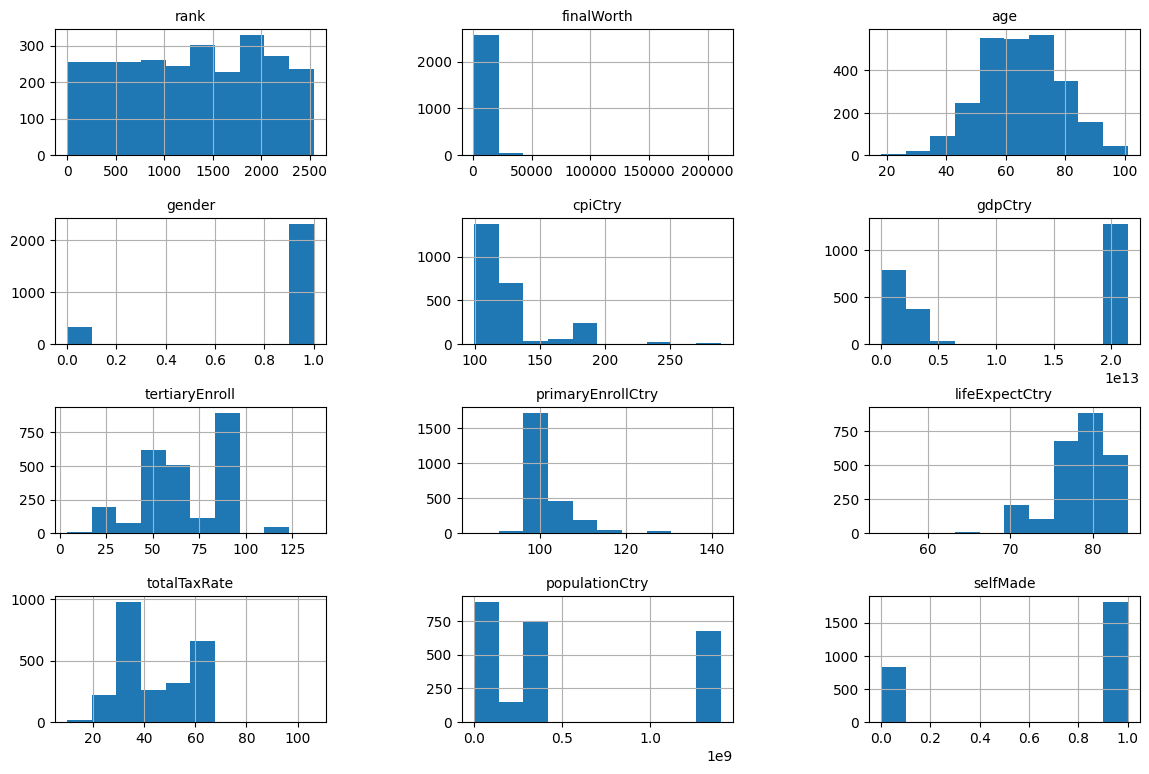

In [16]:
# Gere o histograma
ax_array = dataset.hist(figsize=(14, 9))

# Ajuste o espaçamento vertical e horizontal
plt.subplots_adjust(hspace=0.5, wspace=0.5)

# Reduza o tamanho da fonte de todos os textos
for ax in ax_array.flatten():
    ax.set_title(ax.get_title(), fontsize=10)  # Ajuste o valor de fontsize conforme necessário

# Exiba o gráfico
plt.show()

### Gráfico de Densidade
O Density Plot, ou Gráfico de Densidade, guarda semelhanças com o histograma, embora apresente uma visualização ligeiramente diferente. Este tipo de gráfico facilita a identificação da distribuição dos atributos no conjunto de dados. Assim como fizemos com o histograma, iremos gerar um density plot para cada atributo do dataset.


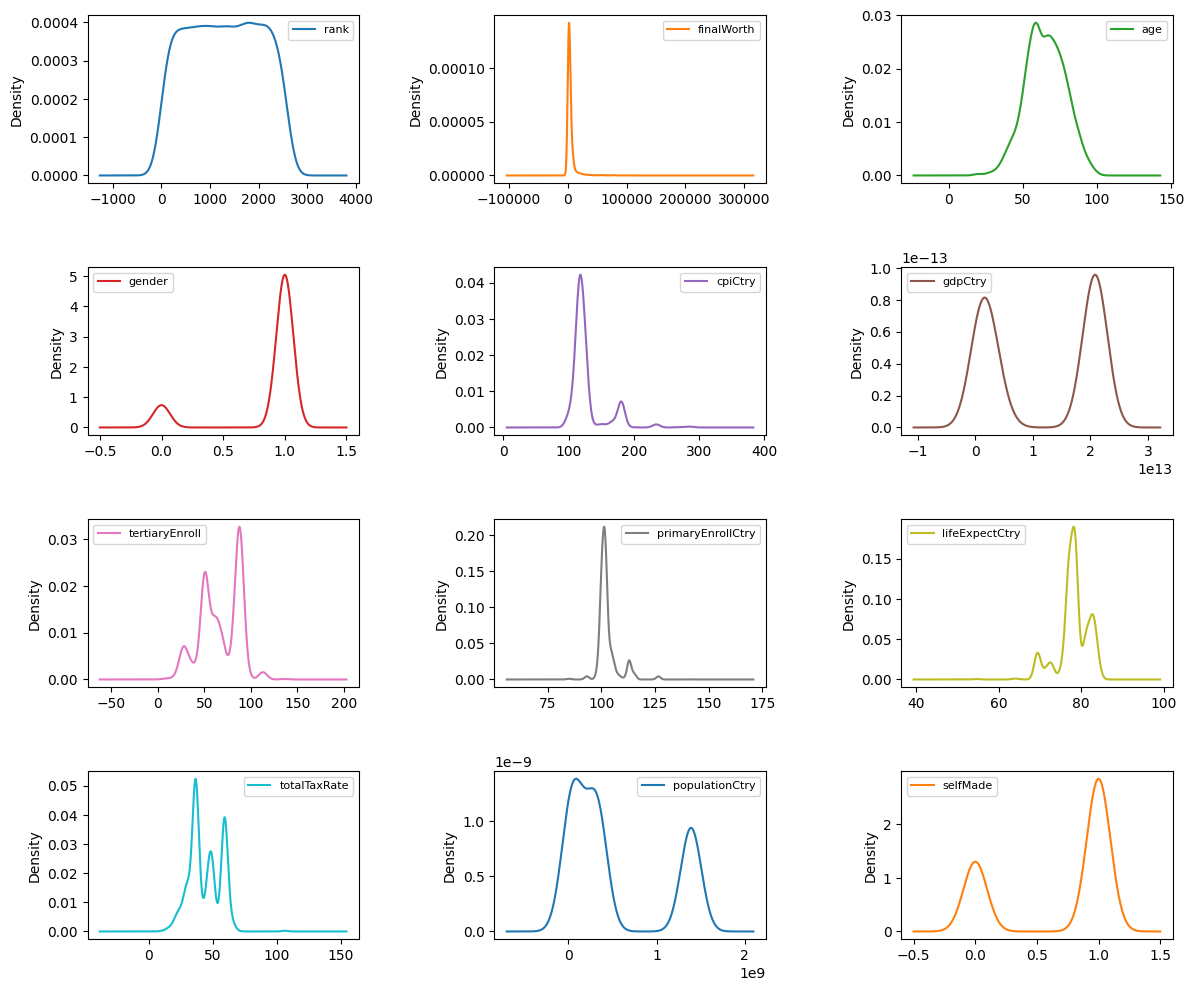

In [17]:
# Gere o gráfico de densidade
ax_array = dataset.plot(kind='density', subplots=True, layout=(4, 3), sharex=False, figsize=(14, 12))

# Ajuste o espaçamento vertical e horizontal
plt.subplots_adjust(hspace=0.5, wspace=0.5)

# Reduza o tamanho da fonte de todos os textos (títulos e legenda)
for ax in ax_array.flatten():
    ax.set_title(ax.get_title(), fontsize=10)  # Ajuste o valor de fontsize conforme necessário
    ax.legend(fontsize=8)  # Ajuste o valor de fontsize conforme necessário para a legenda

# Exiba o gráfico
plt.show()

### Boxplot
A representação gráfica do boxplot oferece insights sobre a dispersão dos dados e a identificação de possíveis valores atípicos. </br>

Como exemplo, podemos analisar o atributo "fortuna final dos bilionários" representada no atributo finalWorth possui uma distribuição fortemente assimétrica, com uma média (mean) significativamente menor que o valor máximo, indicando a presença de valores discrepantes (outliers).</br>

Uma outra visualização muito clara é no atributo idade mostrando uma média global um pouco acima dos 60 anos e outliers na faixa dos 20 anos. Os outliers são bilionários mais jovens, essa análise deve ser confirmada a seguir na análise detalhada da hipótese de número iii que ajuda nesta visualização.


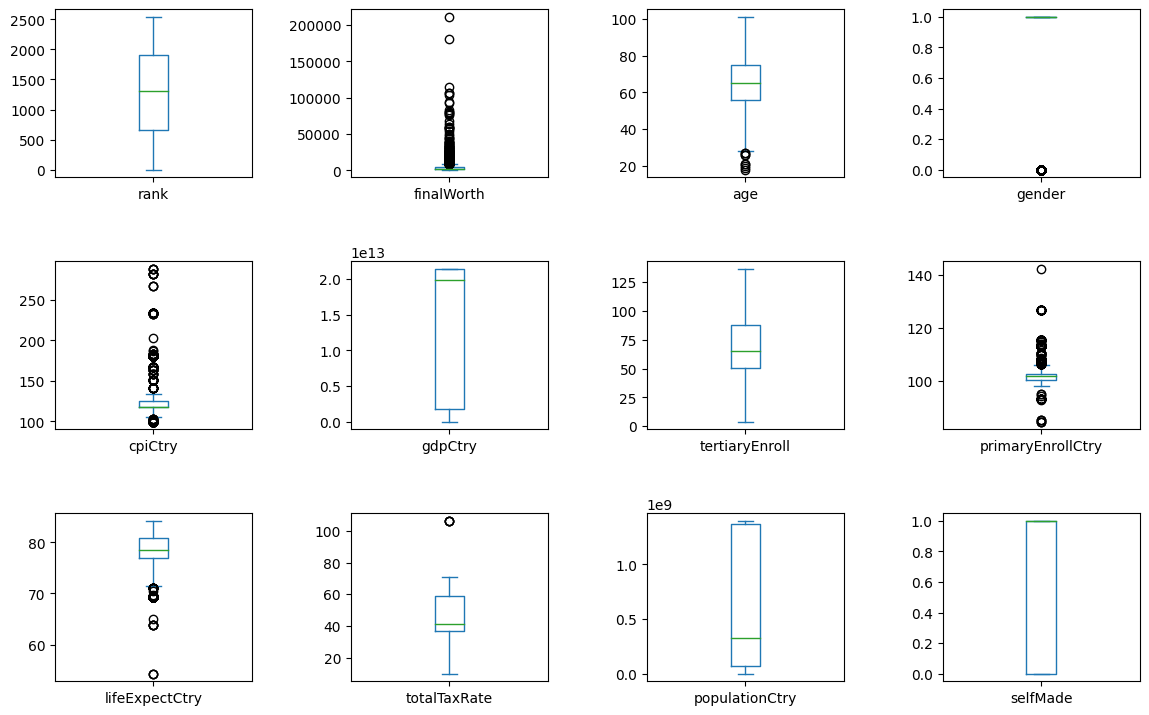

In [18]:
# Boxplot
ax = dataset.plot(kind = 'box', subplots = True, layout = (4,4), sharex = False, sharey = False, figsize = (14,12))

# Ajuste o espaçamento vertical e horizontal
plt.subplots_adjust(hspace=0.5, wspace=0.5)

plt.show()

## 3.3. Visualizações Multimodais

Vamos utilizar visualizações multimodais para explicar um pouco melhor os dados e responder as hipóteses propostas nesse trabalho.

###Análise das Hipóteses

**i. Proporção de Origens de Riqueza:** </br>
Hipótese: A proporção de bilionários que herdaram sua riqueza é maior do que a proporção de bilionários "selfmade".
Justificativa: Parte-se da premissa de que, globalmente, há uma tendência maior de herança de riqueza do que de conquista individual.

Resposta: Com base no resumo estatístico, é observado que a média da variável selfMade é de aproximadamente 0,69, indicando que a maioria dos bilionários no dataset construiu suas fortunas por mérito próprio. O gráfico de barras abaixo apresenta de forma ainda mais clara essa proporção. Com isso podemos afirmar que a proporção de bilionários que constroem sua própria fortuna é maior, o que contradiz a hipótese.

In [19]:
# Substitua 'dataset' pelo nome real do seu DataFrame
selfmade_counts = dataset['selfMade'].value_counts()

# Cria o gráfico de barras
fig = px.bar(x=selfmade_counts.index, y=selfmade_counts.values,
             labels={'x': 'Origem da Fortuna', 'y': 'Número de Bilionários'},
             title='Origem da Fortuna dos Bilionários',
             color=selfmade_counts.index,
             color_discrete_map={0: 'red', 1: 'green'})  # Cores para valores 0 e 1

# Personalizações adicionais
fig.update_layout(showlegend=False)
fig.update_traces(marker_line_width=2, marker_line_color='white')

# Adiciona rótulos às barras
fig.add_annotation(
    text=f"{selfmade_counts.index[0]}: {selfmade_counts[0]}",
    x=0,
    y=selfmade_counts[0] / 2,
    showarrow=False,
    font=dict(size=12),
    textangle=0,
    xanchor='right',
)
fig.add_annotation(
    text=f"{selfmade_counts.index[1]}: {selfmade_counts[1]}",
    x=1,
    y=selfmade_counts[1] / 2,
    showarrow=False,
    font=dict(size=12),
    textangle=0,
    xanchor='left',
)

# Exibe o gráfico
fig.show()

**ii. Disparidade de Gênero na Origem da Riqueza:** </br>
Hipótese: A origem da riqueza varia entre os gêneros, com uma proporção maior de bilionários homens tendo alcançado seu status por méritos próprios em comparação com as bilionárias mulheres. Justificativa: Considerando contextos históricos e sociais, a hipótese explora se os homens bilionários são mais propensos a terem construído suas fortunas através de conquistas pessoais.

Resposta: Com base nos números fornecidos (1716 homens e 96 mulheres entre os bilionários self-made), podemos concluir que há uma disparidade significativa entre homens e mulheres na origem da riqueza. A diferença substancial no número de homens self-made em comparação com mulheres sugere fortemente que, no grupo de bilionários que construíram suas fortunas por méritos próprios, a maioria é composta por homens.

A hipótese de que a origem da riqueza varia entre os gêneros, com uma proporção maior de bilionários homens alcançando seu status por méritos próprios, é apoiada pelos números observados. A justificativa fornecida, que considera contextos históricos e sociais, parece ser consistente com a disparidade encontrada nos dados.


In [20]:
# Filtra os dados para incluir apenas bilionários com selfMade=1
selfmade_data = dataset[dataset['selfMade'] == 1]

gender_counts = selfmade_data['gender'].value_counts()

# Cria o gráfico de pizza
fig = px.pie(gender_counts, labels=gender_counts.index, values=gender_counts.values,
             title="Distribuição de gênero dos bilionários por mérito próprio",
             color_discrete_sequence=px.colors.qualitative.Plotly)

# Configurações adicionais para melhorar a apresentação
fig.update_traces(marker=dict(line=dict(color='white', width=2)))
fig.update_layout(showlegend=False)
fig.update_traces(hole=0.4)

# Adiciona anotações
gender_labels = gender_counts.index
fig.add_annotation(
    text="<b>Gênero</b>",
    x=0.5,
    y=0.5,
    showarrow=False,
    font=dict(size=15),
)
fig.add_annotation(
    text=f"{gender_labels[1]}: {gender_counts[0]}",
    x=0.2,
    y=0.75,
    showarrow=False,
    font=dict(size=12),
)
fig.add_annotation(
    text=f"{gender_labels[0]}: {gender_counts[1]}",
    x=0.8,
    y=0.75,
    showarrow=False,
    font=dict(size=12),
)

# Exibe o gráfico
fig.show()

In [21]:
# Filtra os dados para incluir apenas bilionários com selfMade=0
selfmade_data = dataset[dataset['selfMade'] == 0]

gender_counts = selfmade_data['gender'].value_counts()

# Cria o gráfico de pizza
fig = px.pie(gender_counts, labels=gender_counts.index, values=gender_counts.values,
             title="Distribuição de gênero dos bilionários por herança",
             color_discrete_sequence=px.colors.qualitative.Plotly)

# Configurações adicionais para melhorar a apresentação
fig.update_traces(marker=dict(line=dict(color='white', width=2)))
fig.update_layout(showlegend=False)
fig.update_traces(hole=0.4)

# Adiciona anotações
gender_labels = gender_counts.index
fig.add_annotation(
    text="<b>Gênero</b>",
    x=0.5,
    y=0.5,
    showarrow=False,
    font=dict(size=15),
)
fig.add_annotation(
    text=f"{gender_labels[1]}: {gender_counts[0]}",
    x=0.2,
    y=0.75,
    showarrow=False,
    font=dict(size=12),
)
fig.add_annotation(
    text=f"{gender_labels[0]}: {gender_counts[1]}",
    x=0.8,
    y=0.75,
    showarrow=False,
    font=dict(size=12),
)

**iii. Influência da Idade na Origem da Riqueza:** </br>
Hipótese: Bilionários mais velhos têm uma probabilidade maior de terem construído suas fortunas por mérito próprio em comparação com bilionários mais jovens. Justificativa: A suposição é que a experiência e o conhecimento acumulado ao longo dos anos podem contribuir para uma maior incidência de conquista individual entre os bilionários mais velhos.</b>

Resposta: Com base na análise do gráfico de barras empilhadas, a seguir, que mostra a proporção de bilionários "SelfMade" por idade, podemos confirmar que a hipótese relacionada à influência da idade na origem da riqueza é verdadeira. O gráfico revela claramente que bilionários mais velhos têm uma probabilidade significativamente maior de terem construído suas fortunas por mérito próprio em comparação com bilionários mais jovens. A representação visual evidencia que, à medida que a idade dos bilionários aumenta, a proporção de indivíduos que alcançaram seu status por mérito próprio também aumenta consistentemente.

Assim, os resultados obtidos fornecem suporte estatístico à ideia de que a idade desempenha um papel significativo na origem da riqueza entre os bilionários, validando a hipótese formulada.

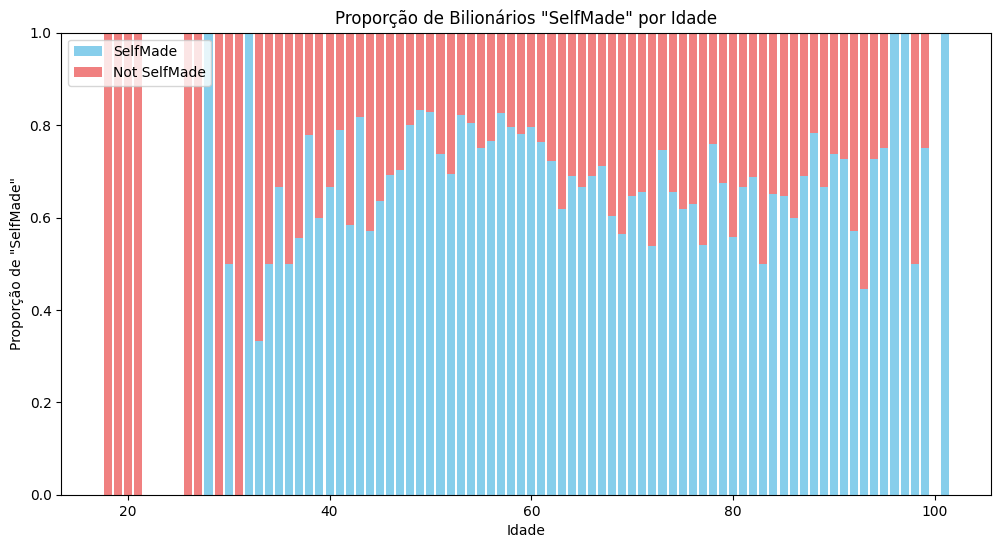

In [22]:
# Agrupe os dados por idade e calcule a proporção de SelfMade
age_selfmade_ratio = dataset.groupby('age')['selfMade'].mean().reset_index()

# Adicione a coluna "NotSelfMade" para completar a contagem
age_selfmade_ratio['NotSelfMade'] = 1 - age_selfmade_ratio['selfMade']

# Plote o gráfico de barras empilhadas
plt.figure(figsize=(12, 6))
plt.bar(age_selfmade_ratio['age'], age_selfmade_ratio['selfMade'], color='skyblue', label='SelfMade')
plt.bar(age_selfmade_ratio['age'], age_selfmade_ratio['NotSelfMade'], color='lightcoral', bottom=age_selfmade_ratio['selfMade'], label='Not SelfMade')
plt.title('Proporção de Bilionários "SelfMade" por Idade')
plt.xlabel('Idade')
plt.ylabel('Proporção de "SelfMade"')
plt.legend()
plt.show()

**iv. Indústria de Tecnologia:** <br/>

Hipótese: A indústria de tecnologia é a mais comum entre os bilionários "selfMade". Justificativa: A rápida ascensão de bilionários na indústria de tecnologia sugere que essa área pode ser uma fonte proeminente de fortunas construídas por mérito próprio.<br/>

Resposta: A análise dos dados confirma a hipótese de que a indústria de tecnologia é uma fonte proeminente de fortunas construídas por mérito próprio entre os bilionários. Ao examinarmos a distribuição dos bilionários na indústria de tecnologia, observamos que uma proporção significativa deles alcançou seu status por meio de conquistas individuais. Essa tendência destaca a importância dessa indústria como catalisador para a geração de riqueza por mérito próprio, respaldando assim a hipótese inicial.


In [23]:
# Substitua 'dataset' pelo nome real do seu DataFrame
fig7 = px.treemap(dataset, path=['industries'], values='finalWorth',
                  title='Distribuição de Riqueza por Indústria',
                  color_discrete_sequence=px.colors.qualitative.Set1)
fig7.update_traces(textinfo="label+percent entry")
fig7.update_layout(margin=dict(t=50, l=0, r=0, b=0))
fig7.show()

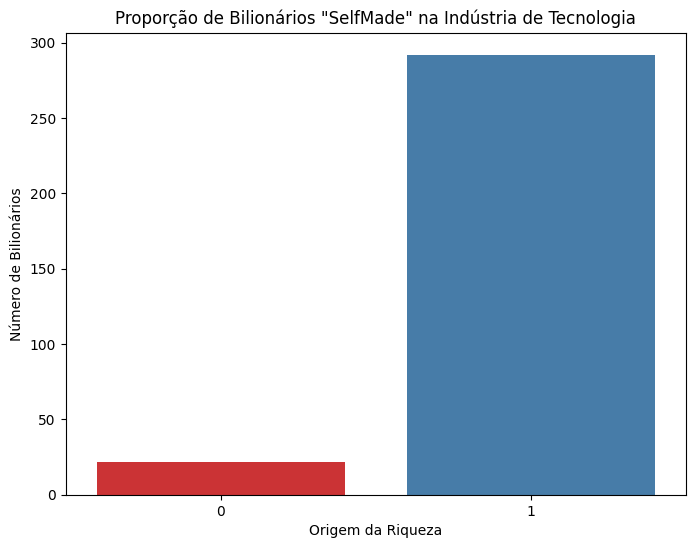

In [24]:
# Filtra o dataset para incluir apenas a indústria de tecnologia
tech_billionaires = dataset[dataset['industries'] == 'Technology']

# Cria um gráfico de barras
plt.figure(figsize=(8, 6))
sns.countplot(x='selfMade', data=tech_billionaires, palette='Set1')
plt.title('Proporção de Bilionários "SelfMade" na Indústria de Tecnologia')
plt.xlabel('Origem da Riqueza')
plt.ylabel('Número de Bilionários')
plt.show()

**v. Relação entre Produto Interno Bruto (PIB) e Herança de Riqueza:**

Hipótese: Em países com maior Produto Interno Bruto, a proporção de bilionários que herdou a riqueza é maior. Justificativa: A ideia subjacente é que em economias mais robustas, as oportunidades de herança de riqueza podem ser mais amplas.</br>

Resposta: Observa-se, nos dados disponíveis, que os países com PIB mais elevados não apresentam bilionários "SelfMade" (aqueles que construíram suas fortunas por mérito próprio). Essa visualização confirma a hipótese que em economias mais robustas, há uma maior incidência de indivíduos que alcançaram o status de bilionário por meio de herança. </br>
A análise respalda a ideia de que o mérito próprio desempenha um papel mais significativo na trajetória financeira dos bilionários em economias menos favorecidas. Minha sugestão é procurar e ingerir novas fontes de dados em trabalhos futuros para refazer a análise em uma perspectiva mais robusta para de fato confirmar essa hipótese.

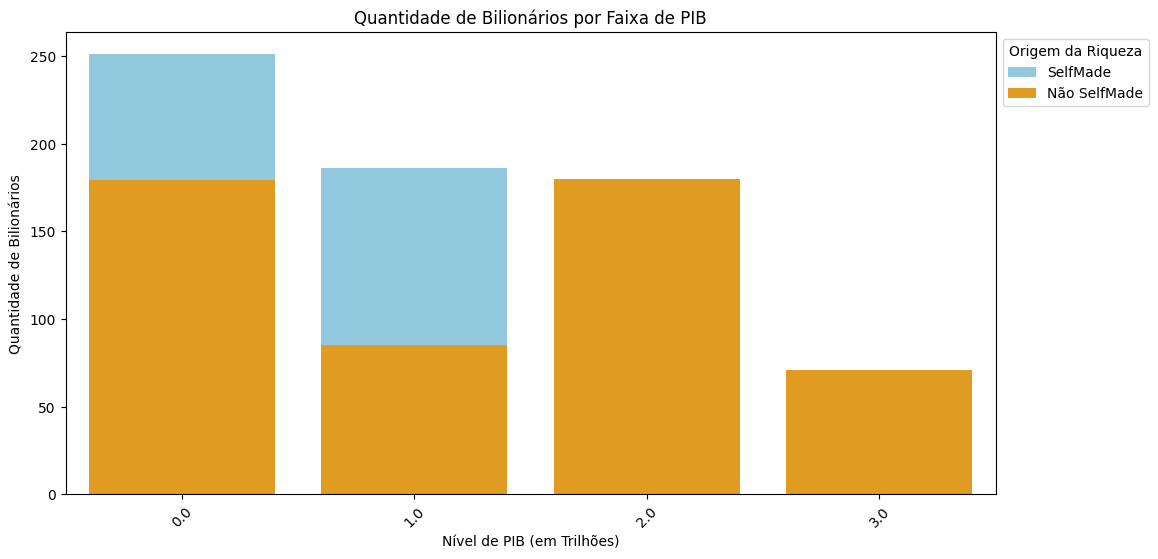

In [25]:
# Converta os valores de GDP para trilhões
dataset['gdpCtry_trillion'] = dataset['gdpCtry'] / 1e12

# Defina os intervalos desejados para a variável gdpCtry_trillion
bins = [0, 1, 2, 3, 4, 5]

# Agrupe os dados por faixas de GDP e conte a quantidade de bilionários em cada faixa
gdp_counts = dataset.groupby(pd.cut(dataset['gdpCtry_trillion'], bins=bins, labels=False, include_lowest=True))['selfMade'].value_counts().unstack().reset_index()

# Plote o gráfico de barras empilhadas
plt.figure(figsize=(12, 6))
sns.barplot(x='gdpCtry_trillion', y=1, data=gdp_counts, color='skyblue', label='SelfMade')
sns.barplot(x='gdpCtry_trillion', y=0, data=gdp_counts, color='orange', label='Não SelfMade')
plt.title('Quantidade de Bilionários por Faixa de PIB')
plt.xlabel('Nível de PIB (em Trilhões)')
plt.ylabel('Quantidade de Bilionários')
plt.xticks(rotation=45)
plt.legend(title='Origem da Riqueza', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

### 3.3. Matriz de Correlação
A matriz de correlação é uma ferramenta estatística que exibe as correlações entre todas as variáveis em um conjunto de dados. Cada célula na matriz representa o coeficiente de correlação entre duas variáveis.

A próxima etapa envolve a verificação da covariância entre as variáveis numéricas do dataset. A covariância reflete como duas variáveis numéricas estão relacionadas, sendo possível utilizar métricas como o coeficiente de correlação de Pearson para interpretar essas relações. Valores próximos de -1 indicam uma correlação negativa, valores próximos de +1 indicam correlação positiva, e valores próximos de 0 indicam ausência de correlação entre as variáveis.

É relevante observar que essa informação é crucial, especialmente para algoritmos como regressão linear e regressão logística, que podem enfrentar desafios de desempenho quando lidam com atributos altamente correlacionados. Nestes casos devem ser feitos os tratamentos necessários.

Separamos abaixo alguns exemplos de correlação. Optamos na fase de análise exploratória manter esses atributos no projeto. Em tempo de pré-processamento e definição dos modelos de ML podemos rediscutir a necessidade dessas features:

a. Correlação alta entre totalTaxRate e populationCtry, cidades com população maior arrecadam mais.
b. A Quantidade de habitantes tem uma correlação negativa alta com a expectativa de vida e grau de instrução.
c. Expectativa de vida e inflação apresentam uma correlação negativa alta.

**Correlação com a Variável de Saída (selfMade):** Não há correlação específica evidente na matriz para a variável de saída selfMade em relação às outras variáveis. Isso sugere que as características do bilionário não apresentam correlações lineares fortes com a autossuficiência financeira.
É importante destacar que correlação não implica causalidade, e uma compreensão mais profunda das relações entre as variáveis pode depender de outras técnicas estatísticas e de machine learning.

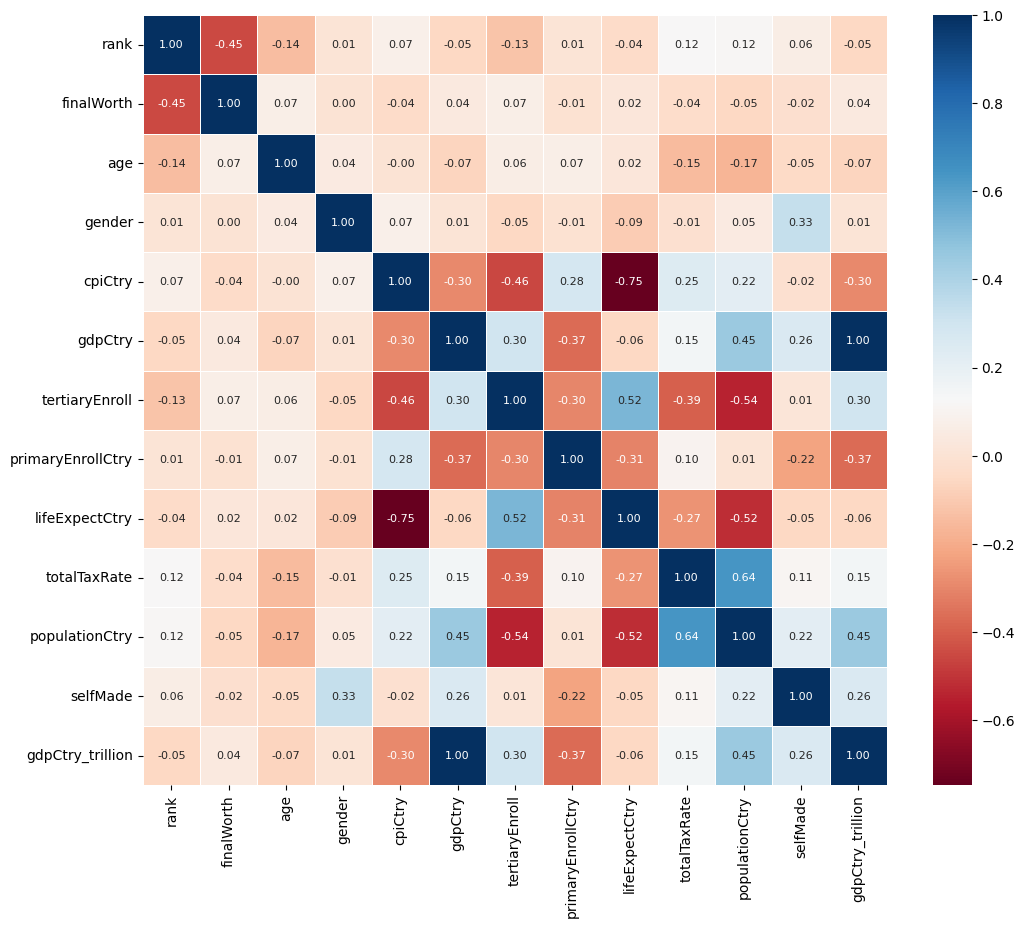

In [26]:
# Matriz de Correlação com Matplotlib Seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(dataset.corr(), annot=True, cmap='RdBu', fmt=".2f", linewidths=.5, annot_kws={"size": 8})
plt.show()

Por sua vez, o gráfico de dispersão (**scatter plot**) mostra o relacionamento entre os pares de variáveis. Vamos exibir um para cada par de atributos do dataset, usando o Seaborn. Esta visualização permite observar a distribuição dos bilinários selfmade em diferentes perspectivas, identificando as regiões onde estão agrupados. </br>
Por exemplo, há um agrupamento de bilionários em faixa etária acima dos 50 anos. Podemos observar maior expectativa de vida em cidades com população menor, bem como a maior presença de bilionários nessas cidades. Esse gráfico ajuda na visualização geral dos dados em complemento às visualizações já apresentadas no escopo desse trabalho.

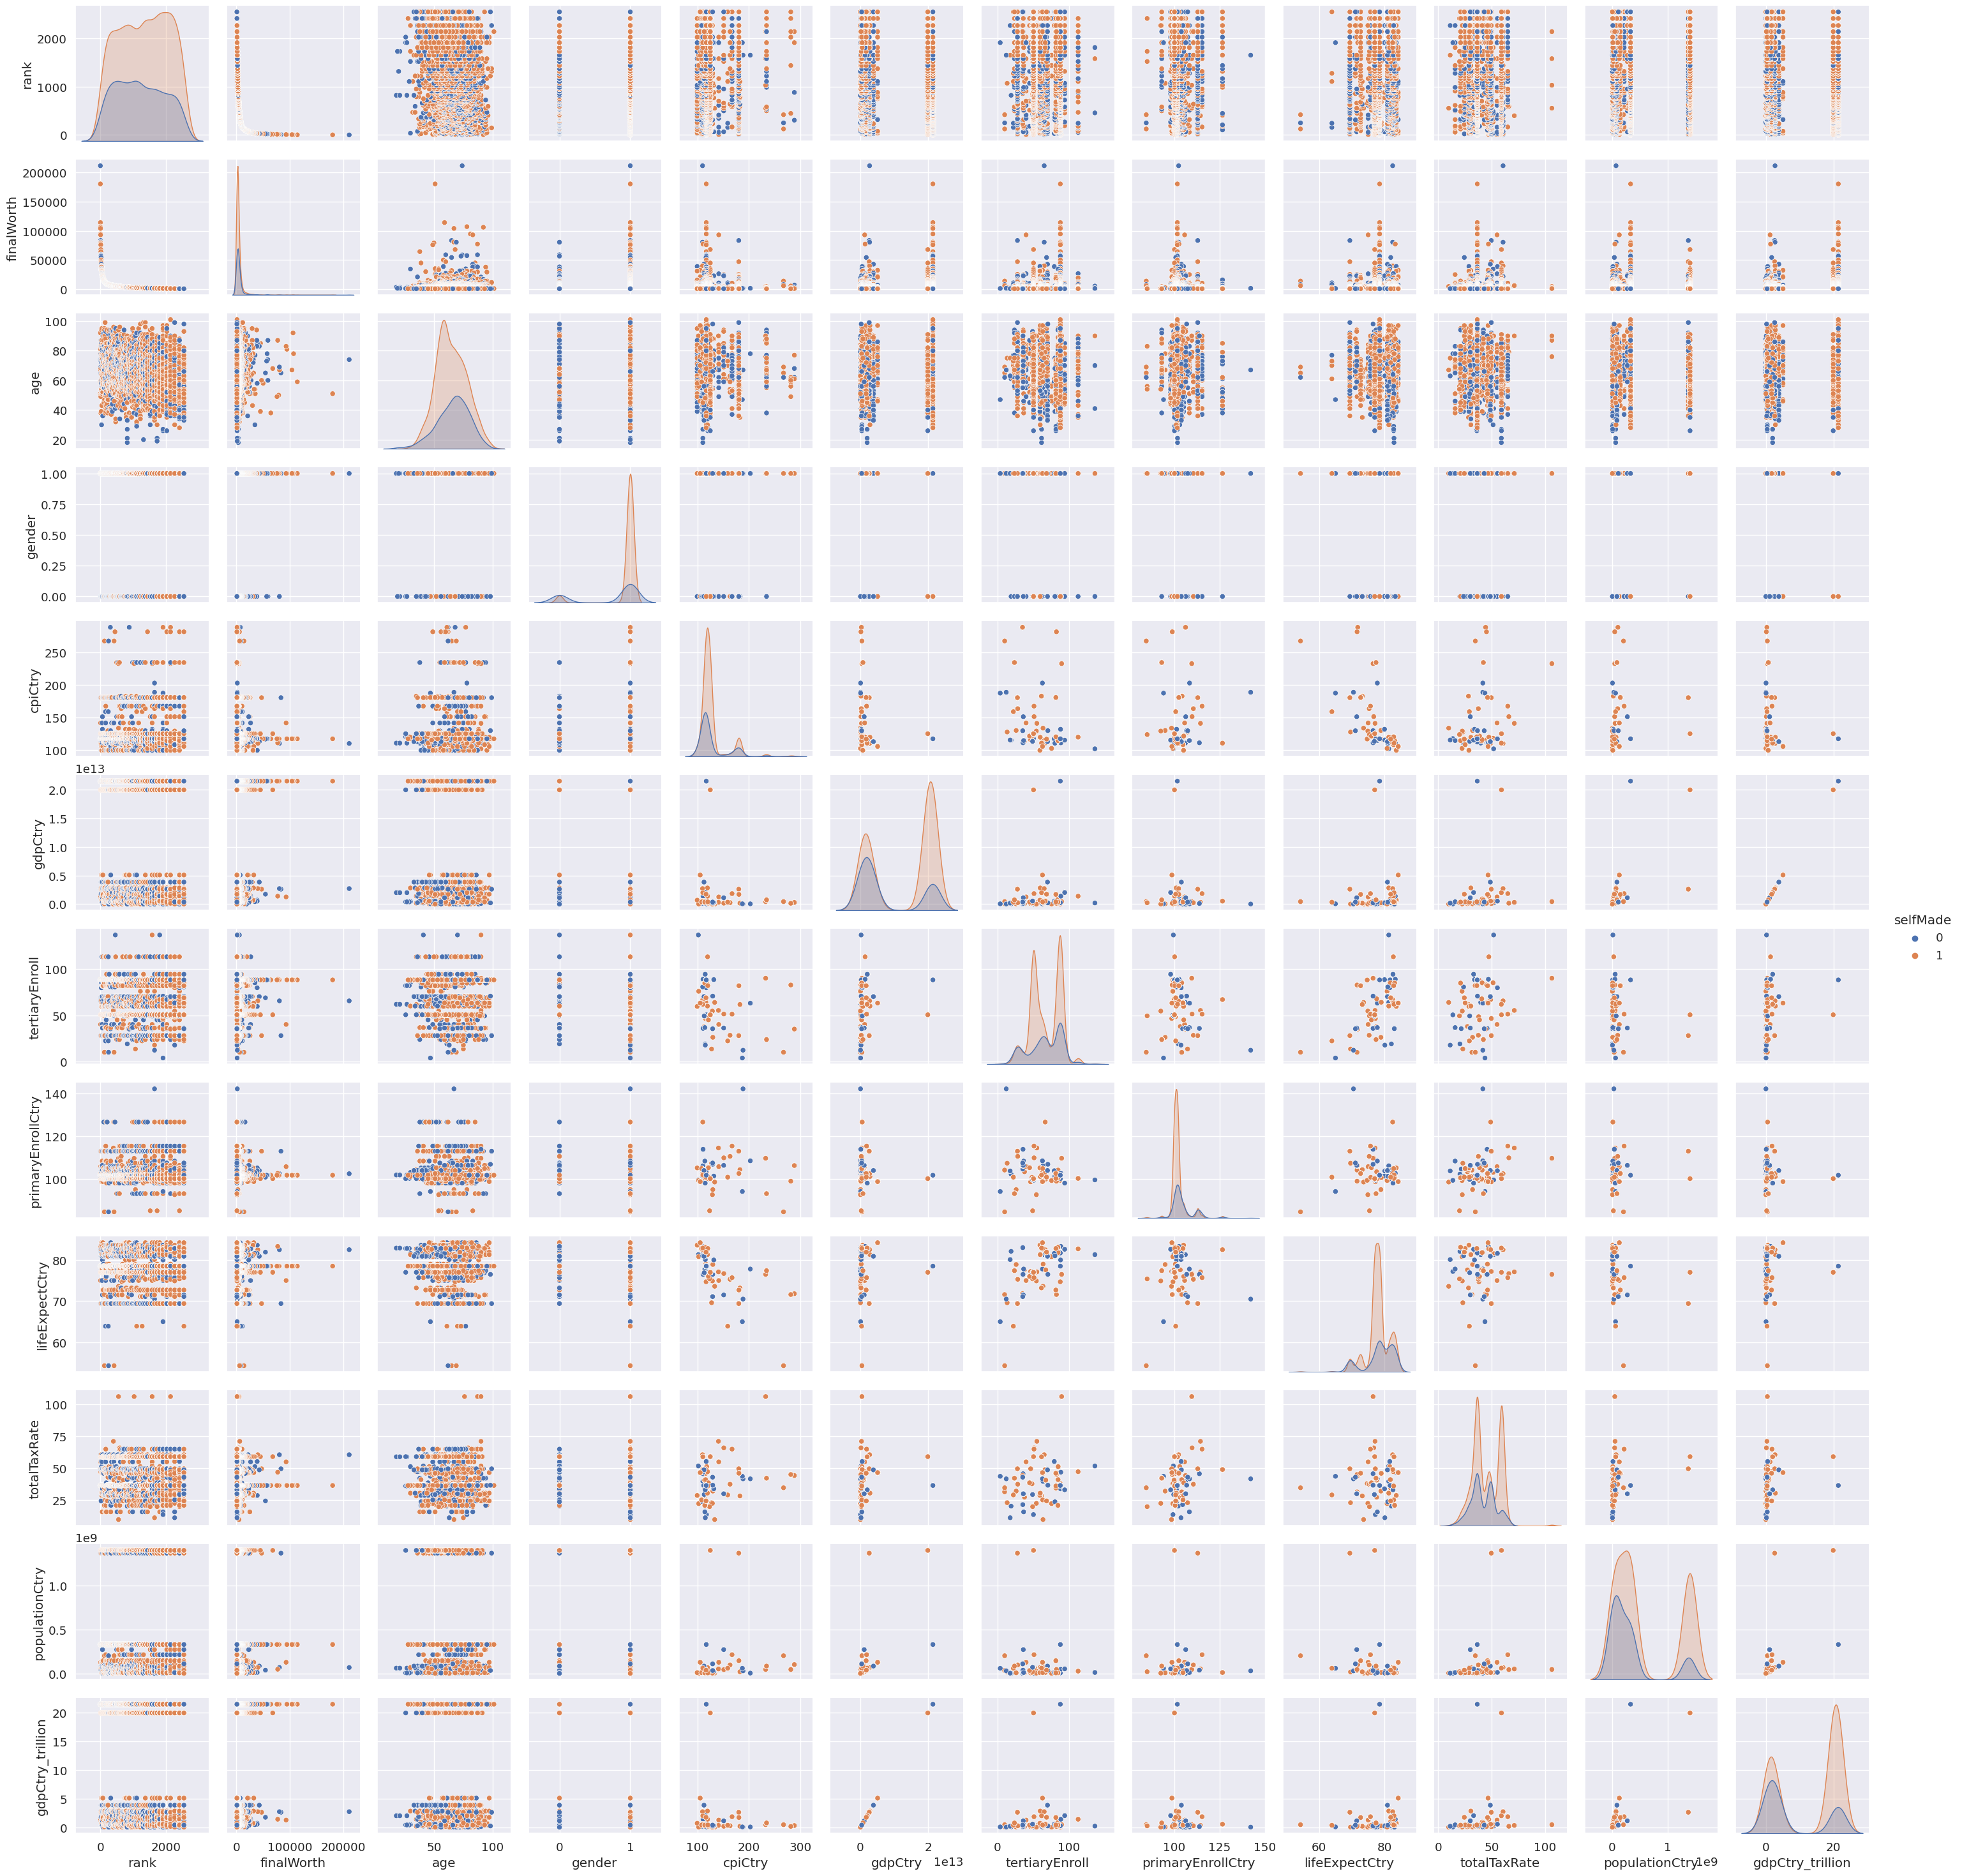

In [27]:
# Define o tamanho da fonte
sns.set(font_scale=1.2)

# Scatter Plot com Seaborn

sns.pairplot(dataset, hue = "selfMade", height = 2.5);

## 4. Pré-Processamento de dados

Nesta etapa, poderíamos realizar diversas operações de preparação de dados, como por exemplo, tratamento de valores missings (faltantes), limpeza de dados, transformações como one-hot-encoding, seleção de características (feature selection), entre outras não mostradas neste notebook. Lembre-se de não criar uma versão padronizada/normalizada dos dados neste momento (apesar de serem operações de pré-processamento) para evitar o Data Leakage.

### 4.1. Tratamento de Missings e Limpeza

É verificada a presença de valores nulos em cada coluna do conjunto de dados representado pela variável dataset. Utilizando a função isnull(), que gera uma matriz booleana indicando as posições dos valores nulos. Em seguida, a função sum() é aplicada para contar o número de valores nulos em cada coluna, resultando em uma série que mostra a quantidade de valores ausentes em cada atributo do conjunto de dados. Tais valores serão tratados a seguir.

In [28]:
# verificando nulls no dataset
dataset.isnull().sum()

rank                   0
finalWorth             0
age                   65
industries             0
gender                 0
cpiCtry              184
gdpCtry              164
tertiaryEnroll       182
primaryEnrollCtry    181
lifeExpectCtry       182
totalTaxRate         182
populationCtry       164
selfMade               0
gdpCtry_trillion     164
dtype: int64

<Axes: >

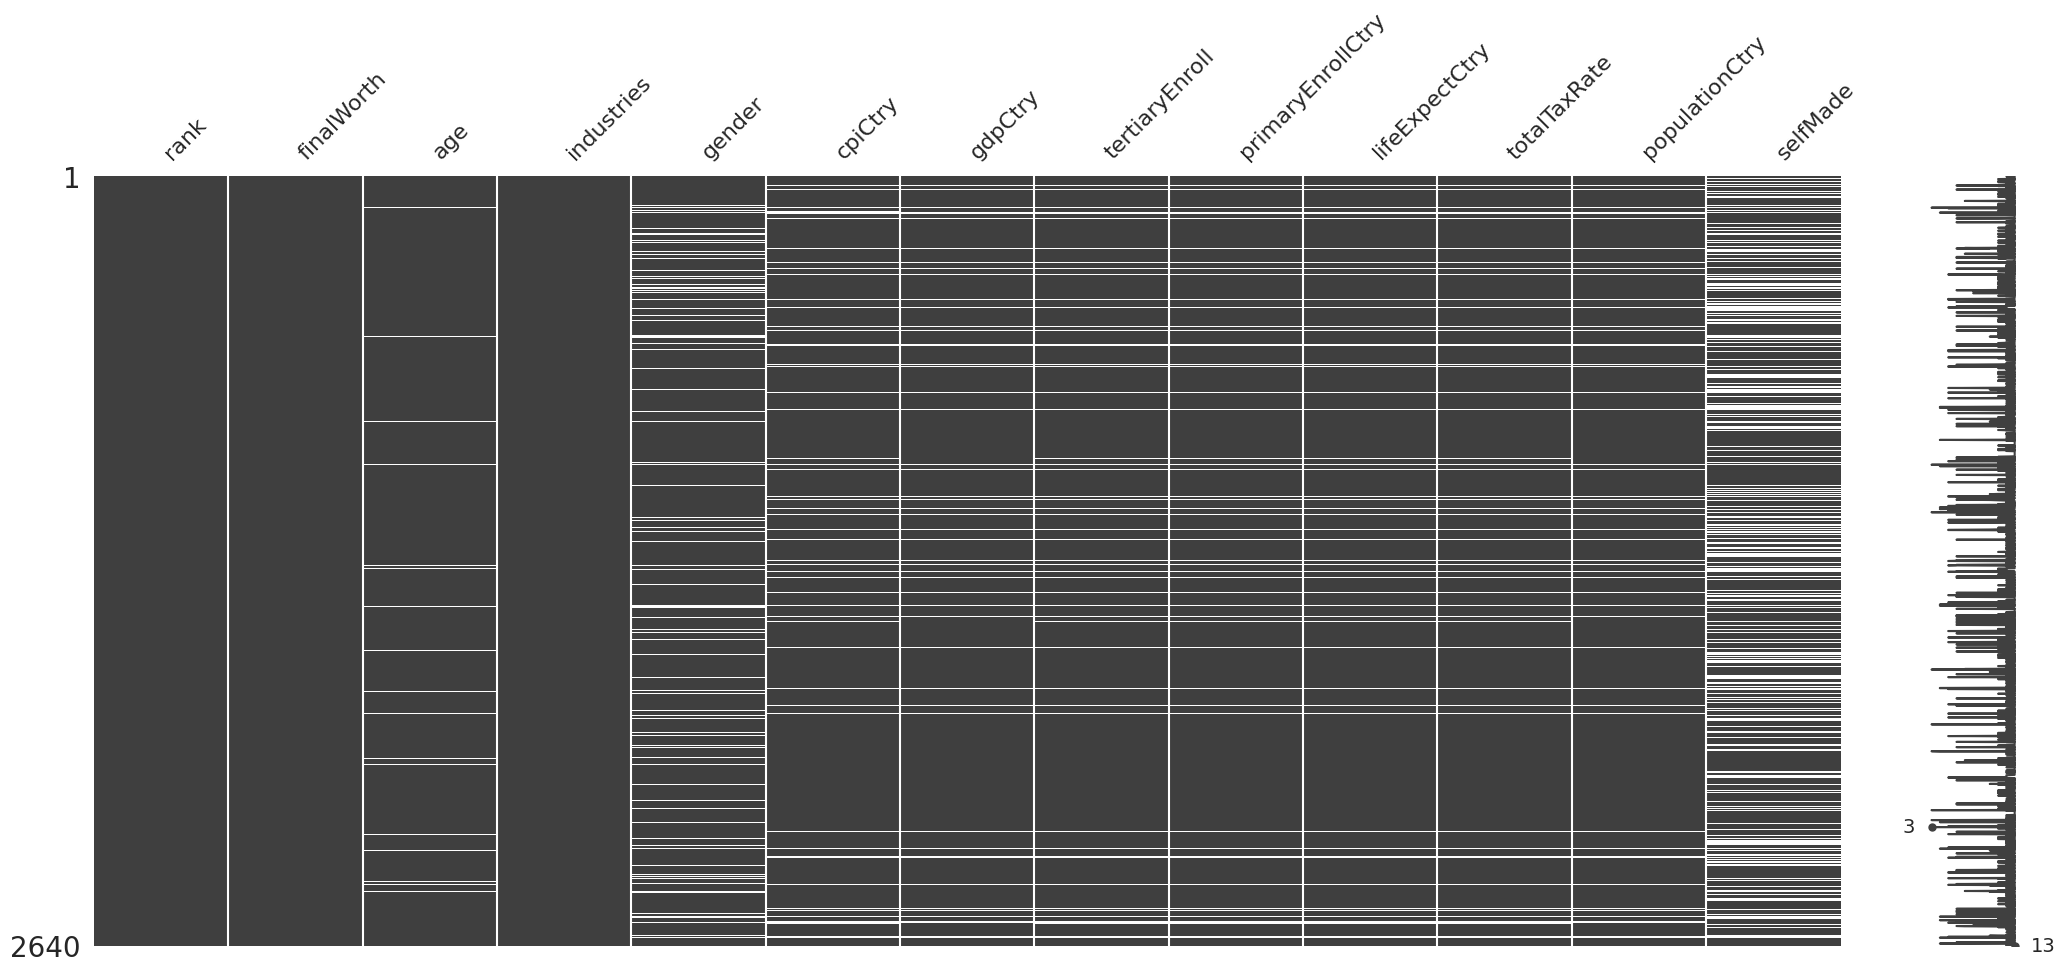

In [29]:
# salvando um NOVO dataset para tratamento de missings (cuidado para não sobrescrever o dataset original!)

# recuperando os nomes das colunas
col = list(dataset.columns)

# o novo dataset irá conter todas as colunas com exceção da última (selfMade)
atributos = dataset[col[0:-1]]

# substituindo os zeros por NaN
atributos.replace(0, np.nan, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)

<Axes: >

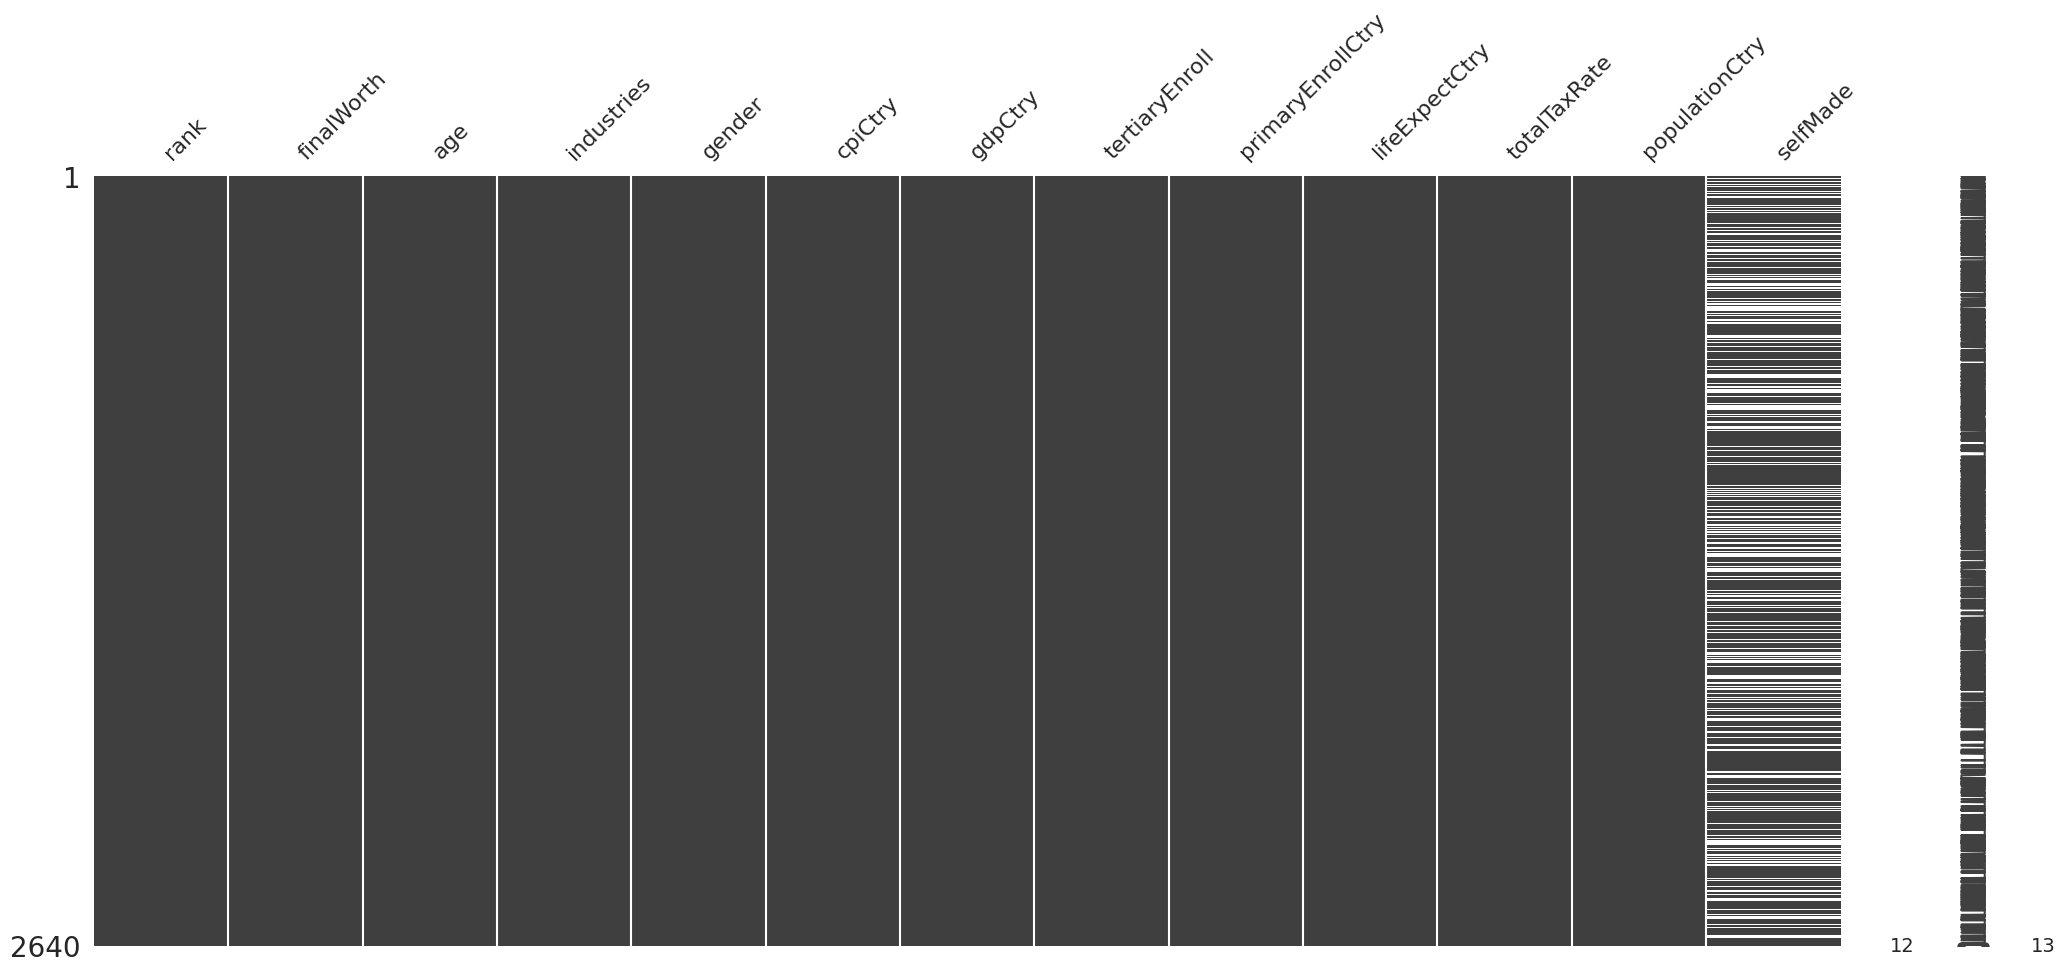

In [30]:
# substituindo os NaN de 'gender' por 0
atributos['gender'].fillna(0, inplace=True)

# substituindo os NaN de 'age', 'cpiCtry', 'cpiChgCtry', 'tertiaryEnroll', 'primaryEnrollCtry', 'lifeExpectCtry', 'taxRevCtry', 'totalTaxRate', 'populationCtry' pela mediana da coluna
atributos['age'].fillna(atributos['age'].median(), inplace=True)
atributos['cpiCtry'].fillna(atributos['cpiCtry'].median(), inplace=True)
atributos['gdpCtry'].fillna(atributos['gdpCtry'].median(), inplace=True)
atributos['primaryEnrollCtry'].fillna(atributos['primaryEnrollCtry'].median(), inplace=True)
atributos['tertiaryEnroll'].fillna(atributos['tertiaryEnroll'].median(), inplace=True)
atributos['lifeExpectCtry'].fillna(atributos['lifeExpectCtry'].median(), inplace=True)
atributos['totalTaxRate'].fillna(atributos['totalTaxRate'].median(), inplace=True)
atributos['populationCtry'].fillna(atributos['populationCtry'].median(), inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)

In [31]:
# verificando nulls no dataset
atributos.isnull().sum()

rank                   0
finalWorth             0
age                    0
industries             0
gender                 0
cpiCtry                0
gdpCtry                0
tertiaryEnroll         0
primaryEnrollCtry      0
lifeExpectCtry         0
totalTaxRate           0
populationCtry         0
selfMade             828
dtype: int64

In [32]:
# Guardando o novo dataset para testes futuros
datasetSemMissings = atributos

# incluindo a coluna 'selfMade' no novo dataset
datasetSemMissings['selfMade'] = dataset['selfMade']

# exibindo as primeiras linhas
datasetSemMissings.head()

,rank,finalWorth,age,industries,gender,cpiCtry,gdpCtry,tertiaryEnroll,primaryEnrollCtry,lifeExpectCtry,totalTaxRate,populationCtry,selfMade
0,1,211000,74.0,Fashion & Retail,1.0,110.05,2.715518e+12,65.6,102.5,82.5,60.7,67059887.0,0
1,2,180000,51.0,Automotive,1.0,117.24,2.142770e+13,88.2,101.8,78.5,36.6,328239523.0,1
2,3,114000,59.0,Technology,1.0,117.24,2.142770e+13,88.2,101.8,78.5,36.6,328239523.0,1
3,4,107000,78.0,Technology,1.0,117.24,2.142770e+13,88.2,101.8,78.5,36.6,328239523.0,1
4,5,106000,92.0,Finance & Investments,1.0,117.24,2.142770e+13,88.2,101.8,78.5,36.6,328239523.0,1


### 4.2. One-Hot Encoder



O one-hot-encoding é uma técnica comumente empregada para lidar com variáveis categóricas em algoritmos de aprendizado de máquina, especialmente quando se trabalha com modelos que requerem entradas numéricas.

No caso da coluna "industries", que contém diferentes categorias como "Fashion & Retail", "Automotive", "Technology", entre outras, o one-hot-encoder cria colunas binárias para cada categoria única. Cada coluna binária representa a presença ou ausência da categoria correspondente para cada observação no conjunto de dados.

Esta abordagem é crucial porque muitos algoritmos de aprendizado de máquina não são capazes de lidar diretamente com variáveis categóricas. Ao transformar a coluna "industries" usando one-hot-encoding, garantimos que a informação sobre a indústria associada a cada bilionário seja preservada de forma adequada, sem impor uma ordem artificial ou hierarquia entre as categorias.

In [33]:
# Selecionar os campos desejados para aplicar o One-Hot Encoding
cols_to_encode = ['industries']

# Criar um objeto OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Aplicar o One-Hot Encoding nos campos selecionados
encoded_cols = encoder.fit_transform(datasetSemMissings[cols_to_encode])

# Criar um DataFrame com as colunas codificadas
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(cols_to_encode))

# Concatenar o DataFrame original com o DataFrame codificado
dataset_encoded = pd.concat([datasetSemMissings.drop(cols_to_encode, axis=1), encoded_df], axis=1)

# Reordenar as colunas
new_columns = list(dataset_encoded.columns)
new_columns.remove("selfMade")
new_columns.append("selfMade")
dataset_encoded = dataset_encoded.reindex(columns=new_columns)

dataset_encoded.head(10)

,rank,finalWorth,age,gender,cpiCtry,gdpCtry,tertiaryEnroll,primaryEnrollCtry,lifeExpectCtry,totalTaxRate,populationCtry,industries_Automotive,industries_Construction & Engineering,industries_Diversified,industries_Energy,industries_Fashion & Retail,industries_Finance & Investments,industries_Food & Beverage,industries_Gambling & Casinos,industries_Healthcare,industries_Logistics,industries_Manufacturing,industries_Media & Entertainment,industries_Metals & Mining,industries_Real Estate,industries_Service,industries_Sports,industries_Technology,industries_Telecom,selfMade
0,1,211000,74.0,1.0,110.05,2.715518e+12,65.6,102.5,82.5,60.7,6.705989e+07,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,2,180000,51.0,1.0,117.24,2.142770e+13,88.2,101.8,78.5,36.6,3.282395e+08,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,3,114000,59.0,1.0,117.24,2.142770e+13,88.2,101.8,78.5,36.6,3.282395e+08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
3,4,107000,78.0,1.0,117.24,2.142770e+13,88.2,101.8,78.5,36.6,3.282395e+08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
4,5,106000,92.0,1.0,117.24,2.142770e+13,88.2,101.8,78.5,36.6,3.282395e+08,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5,6,104000,67.0,1.0,117.24,2.142770e+13,88.2,101.8,78.5,36.6,3.282395e+08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
6,7,94500,81.0,1.0,117.24,2.142770e+13,88.2,101.8,78.5,36.6,3.282395e+08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7,8,93000,83.0,1.0,141.54,1.258287e+12,40.2,105.8,75.0,55.1,1.260140e+08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
8,9,83400,65.0,1.0,180.44,2.611000e+12,28.1,113.0,69.4,49.7,1.366418e+09,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9,10,80700,67.0,1.0,117.24,2.142770e+13,88.2,101.8,78.5,36.6,3.282395e+08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1


In [34]:
# Mostra as dimensões do dataset
print(dataset.shape)

(2640, 14)


## 4.3 Separação em conjunto de treino e teste

É uma boa prática usar um conjunto de teste (na literatura também chamado de conjunto de validação), uma amostra dos dados que não será usada para a construção do modelo, mas somente no fim do projeto para confirmar a precisão do modelo final. É um teste que podemos usar para verificar o quão boa foi a construção do modelo, e para nos dar uma ideia de como o modelo irá performar nas estimativas em dados não vistos. Usaremos 80% do conjunto de dados para modelagem e guardaremos 20% para teste, usando a estratégia train-test-split, já explicada anteriormente. Primeiramente, iremos sinalizar quais são as colunas de atributos (X - 0 a 7) e qual é a coluna das classes (Y - 8). Em seguida, especificaremos o tamanho do conjunto de teste desejado e uma semente (para garantir a reprodutibilidade dos resultados). Finalmente, faremos a separação dos conjuntos de treino e teste através do comando train_test_split, que retornará 4 estruturas de dados: os atributos e classes para o conjunto de teste e os atributos e classes para o conjunto de treino.

In [35]:
test_size = 0.20
seed = 3

# Separação em conjuntos de treino e teste (dataset original)
array = dataset_encoded.values
X = array[:,0:14]
y = array[:,14]
#X_train, X_test, y_train, y_test = train_test_split(X, y,
#    test_size=test_size, shuffle=True, random_state=seed) # sem estratificação
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # com estratificação

## 4.4 Tratamento do desbalanceamento

Utilizei a técnica SMOTE (Synthetic Minority Over-sampling Technique) para lidar com o desbalanceamento das classes no conjunto de treino. O SMOTE é uma abordagem de oversampling que cria amostras sintéticas da classe minoritária, aumentando sua representação para equilibrar com a classe majoritária.

In [36]:
# Balanceamento com a técnica SMOTE
sm= SMOTE(sampling_strategy="minority", random_state=37)
x_train_smote, y_train_smote= sm.fit_resample(X_train, y_train)

# Criar DataFrame com os conjuntos de treino balanceados
df_train_smote = pd.DataFrame(x_train_smote)
df_train_smote['selfMade'] = y_train_smote

# Nova distribuição das classes
class_distribution = df_train_smote.groupby('selfMade').size()
print(class_distribution)

selfMade
0.0    2032
1.0    2032
dtype: int64


## 4.5 Normalização dos Dados

A normalização dos dados é um passo crucial em muitos processos de pré-processamento de dados, especialmente quando diferentes características possuem escalas distintas ou quando se faz uso de algoritmos sensíveis à escala dos dados. No caso específico desse trabalho, a normalização foi aplicada usando o Min-Max Scaler, um transformador que ajusta os dados para um intervalo específico, geralmente entre 0 e 1.

Ao analisar o código fornecido, a normalização foi realizada nos conjuntos de treinamento e teste. Isso é fundamental quando se utiliza um conjunto de treinamento balanceado, gerado pela técnica SMOTE, e se pretende aplicar um modelo de aprendizado de máquina. A normalização garante que todas as características tenham a mesma escala, evitando que algumas delas dominem sobre as outras durante o processo de treinamento, o que poderia levar a um viés no desempenho do modelo.

Portanto, ao normalizar os dados, você está contribuindo para a estabilidade e eficácia do treinamento do modelo, permitindo que ele aprenda de maneira equilibrada a partir das diferentes características presentes nos conjuntos de dados de treinamento e teste normalizados.

In [37]:
# definindo o transformador como min max scaler
scaler = MinMaxScaler()

# Ajustar o normalizador usando apenas os dados de treinamento
scaler.fit(x_train_smote)

# Aplicar a normalização aos dados de treinamento e teste
X_train_normalized = scaler.transform(x_train_smote)
X_test_normalized = scaler.transform(X_test)

# Criar DataFrame com os conjuntos de treino balanceados
df_scaled = pd.DataFrame(X_train_normalized)

df_scaled.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.619929,0.004286,0.590361,1.0,0.093588,1.000000,0.617391,0.297909,0.809365,0.276971,0.234819,0.0,0.0,0.0
1,0.648287,0.003810,0.530120,1.0,0.338430,0.012078,0.145455,0.451220,0.702341,0.287344,0.068988,0.0,0.0,0.0
2,0.458054,0.007619,0.337349,0.0,0.070363,0.179349,0.475099,0.336237,0.889632,0.403527,0.059451,0.0,0.0,0.0
3,0.500591,0.006667,0.734940,1.0,0.135065,0.929161,0.320158,0.270035,0.759197,0.511411,1.000000,0.0,0.0,0.0
4,0.839701,0.001429,0.469880,1.0,0.135065,0.929161,0.320158,0.270035,0.759197,0.511411,1.000000,0.0,0.0,0.0
5,0.130366,0.028571,0.638554,1.0,0.093588,1.000000,0.617391,0.297909,0.809365,0.276971,0.234819,0.0,0.0,0.0
6,0.419850,0.008571,0.566265,1.0,0.070363,0.179349,0.475099,0.336237,0.889632,0.403527,0.059451,0.0,0.0,0.0
7,0.283576,0.013810,0.879518,1.0,0.072585,0.025228,0.309881,0.263066,0.755853,0.203320,0.049787,0.0,0.0,0.0
8,0.795195,0.001905,0.530120,1.0,0.135065,0.929161,0.320158,0.270035,0.759197,0.511411,1.000000,0.0,0.0,0.0
9,0.564395,0.005238,0.566265,1.0,0.427944,0.121722,0.142292,0.493031,0.505017,0.412863,0.977608,1.0,0.0,0.0


## Conclusão

Em conclusão, este trabalho abordou a análise exploratória e o pré-processamento de um conjunto de dados sobre bilionários, com o objetivo de construir um modelo de classificação para prever se um bilionário é "selfMade" com base em diversas características. O processo envolveu a definição do problema, formulação de hipóteses, carga e seleção preliminar de atributos, análise exploratória de dados, visualizações unimodais e multimodais, matriz de correlação, pré-processamento de dados e tratamento do desbalanceamento.

Ao longo da análise, foram confirmadas algumas hipóteses, como a maior proporção de bilionários self-made, a disparidade de gênero na origem da riqueza, a influência da idade na origem da riqueza, a importância da indústria de tecnologia e a relação entre Produto Interno Bruto (PIB) e herança de riqueza. Também foram identificados padrões e tendências nos dados por meio de visualizações, contribuindo para uma compreensão mais profunda do conjunto de dados.

O pré-processamento incluiu tratamento de valores ausentes, one-hot encoding para variáveis categóricas, separação em conjuntos de treino e teste, tratamento do desbalanceamento usando SMOTE e normalização dos dados. Essas etapas são cruciais para preparar os dados para a construção e avaliação de modelos de aprendizado de máquina.

Este trabalho forneceu uma base sólida para futuros passos, incluindo a seleção de modelos de machine learning, ajuste de hiperparâmetros, treinamento e avaliação do modelo. A abordagem metodológica adotada visa não apenas construir um modelo preditivo, mas também compreender as nuances subjacentes às características dos bilionários e como essas características podem influenciar a origem de suas fortunas.

Em resumo, o processo de análise e pré-processamento de dados realizado neste trabalho serve como um alicerce essencial para a construção de um modelo robusto de classificação, contribuindo para uma compreensão mais profunda do fenômeno estudado e proporcionando insights valiosos para investigações futuras.